# Solution: the biggest Earthquake in the UK this Century

## Download the data

In [1]:
import requests

quakes = requests.get(
    "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
    params={
        "starttime": "2000-01-01",
        "maxlatitude": "58.723",
        "minlatitude": "50.008",
        "maxlongitude": "1.67",
        "minlongitude": "-9.756",
        "minmagnitude": "1",
        "endtime": "2018-10-11",
        "orderby": "time-asc",
    },
)

## Parse the data as JSON

In [2]:
import json

In [3]:
quakes.text[0:200]

'<!DOCTYPE html>\n<html>\n  <head>\n    <title>500 Internal Server Error</title>\n    <meta charset="utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <link rel="styl'

In [4]:
requests_json = json.loads(quakes.text)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Note that the `requests` library has native JSON support, so you could do this instead:
`requests_json = quakes.json()`

## Investigate the data to discover how it is structured

There is no foolproof way of doing this. A good first step is to see the type of our data!

In [5]:
type(requests_json)

dict

Now we can navigate through this dictionary to see how the information is stored in the nested dictionaries and lists. The `keys` method can indicate what kind of information each dictionary holds, and the `len` function tells us how many entries are contained in a list. How you explore is up to you!

In [6]:
requests_json.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [7]:
type(requests_json["features"])

list

In [8]:
len(requests_json["features"])

120

In [9]:
requests_json["features"][0]

{'type': 'Feature',
 'properties': {'mag': 2.6,
  'place': '12 km NNW of Penrith, United Kingdom',
  'time': 956553055700,
  'updated': 1415322596133,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 104,
  'net': 'us',
  'code': 'p0009rst',
  'ids': ',usp0009rst,',
  'sources': ',us,',
  'types': ',impact-text,origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': None,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'},
 'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]},
 'id': 'usp0009rst'}

In [10]:
requests_json["features"][0].keys()

dict_keys(['type', 'properties', 'geometry', 'id'])

It looks like the coordinates are in the `geometry` section and the magnitude is in the `properties` section.

In [11]:
requests_json["features"][0]["geometry"]

{'type': 'Point', 'coordinates': [-2.81, 54.77, 14]}

In [12]:
requests_json["features"][0]["properties"].keys()

dict_keys(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type', 'title'])

In [13]:
requests_json["features"][0]["properties"]["mag"]

2.6

## Find the largest quake

In [14]:
quakes = requests_json["features"]

In [15]:
largest_so_far = quakes[0]
for quake in quakes:
    if quake["properties"]["mag"] > largest_so_far["properties"]["mag"]:
        largest_so_far = quake
largest_so_far["properties"]["mag"]

4.8

In [16]:
lat = largest_so_far["geometry"]["coordinates"][1]
long = largest_so_far["geometry"]["coordinates"][0]
print("Latitude: {} Longitude: {}".format(lat, long))

Latitude: 52.52 Longitude: -2.15


## Get a map at the point of the quake

In [17]:
import requests


def request_map_at(lat, long, satellite=True, zoom=10, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"

    params = dict(
        z=zoom,
        size="{},{}".format(size[0], size[1]),
        ll="{},{}".format(long, lat),
        l="sat" if satellite else "map",
        lang="en_US",
    )

    return requests.get(base, params=params)

In [18]:
map_png = request_map_at(lat, long, zoom=10, satellite=False)

## Display the map

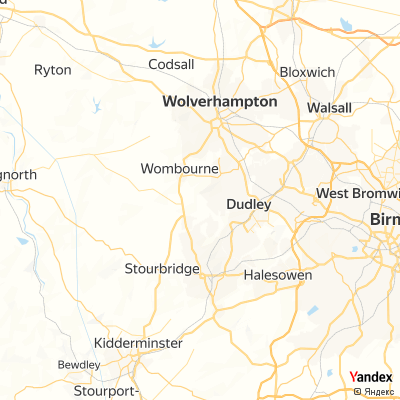

In [19]:
from IPython.display import Image

Image(map_png.content)